<a href="https://colab.research.google.com/github/Pkolekar940/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Pramod Kolekar

# **Project Summary -**

# **GitHub Link -**

# **Problem Statement**


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [130]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import math
import time
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [131]:
# Load the database

url='https://drive.google.com/file/d/1m4lylf_iAyxlsIW1uTGrMSuhHYwuntJl/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
restaurant = pd.read_csv(url)

In [132]:
# Load the database

url='https://drive.google.com/file/d/1JG_8OGZ6tS-0SOstH_x3n9sN0ZI1AFNC/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
review = pd.read_csv(url)


### Dataset First View

In [133]:
# Dataset First Look
restaurant.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [134]:
### Dataset Rows & Columns count
review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [135]:
# Dataset Rows & Columns count
restaurant.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [136]:
# Dataset Rows & Columns count
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

### Dataset Information

In [137]:
# Dataset Info
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [138]:
# Dataset Info
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [139]:
# Dataset Duplicate Value Count
restaurant.duplicated().sum()

0

* ***In the above df after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

In [140]:
review.duplicated().sum()

36

#### Missing Values/Null Values

In [141]:
# Missing Values/Null Values Count
restaurant.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [142]:
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

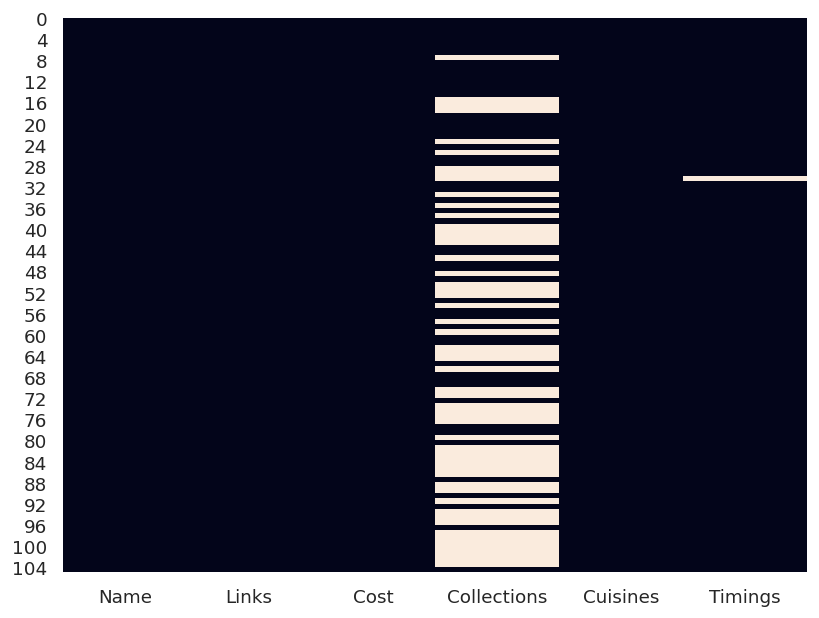

In [143]:
# Let's Visualizing the missing values
# to visualize missing data we can use the heatmap method.

# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":120, "figure.figsize":(8,6)})
sns.heatmap(restaurant.isnull(), cbar=False)

<Axes: >

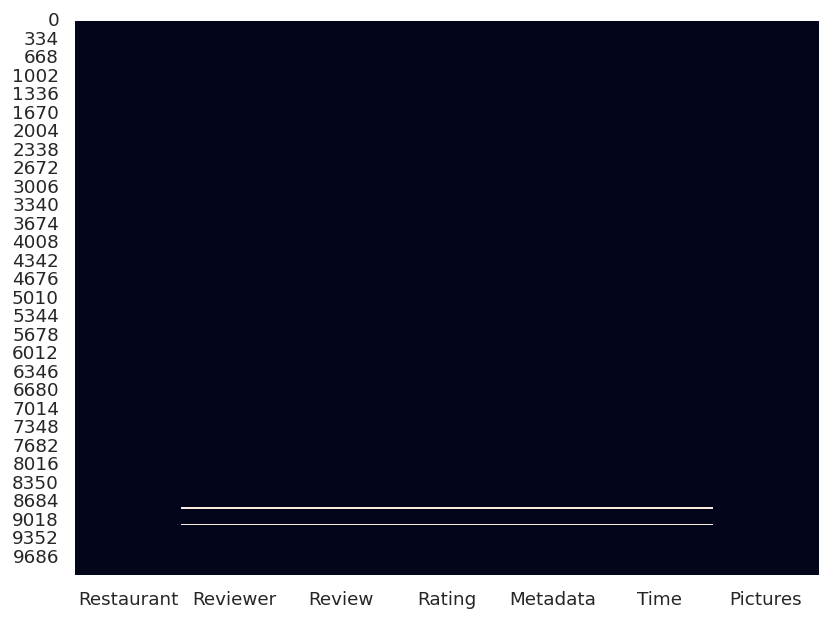

In [144]:
# Let's Visualizing the missing values
# to visualize missing data we can use the heatmap method.

# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":120, "figure.figsize":(8,6)})
sns.heatmap(review.isnull(), cbar=False)

## ***2. Understanding Your Variables***

In [145]:
# Dataset Columns
restaurant.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [146]:
# Dataset Describe
restaurant.describe(include='all').T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [147]:
# Dataset Columns
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [148]:
# Dataset Describe
review.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


### Variables Description

### Check Unique Values for each variable.

In [149]:
# Let's Check Unique Values  of restaurant for each variable.

for ele in restaurant:
  print(f'Number of unique values in {ele} is {restaurant[ele].nunique()}.')

Number of unique values in Name is 105.
Number of unique values in Links is 105.
Number of unique values in Cost is 29.
Number of unique values in Collections is 42.
Number of unique values in Cuisines is 92.
Number of unique values in Timings is 77.


In [150]:
# Let's Check Unique Values  of review for each variable.

for ele in review:
  print(f'Number of unique values in {ele} is {review[ele].nunique()}.')

Number of unique values in Restaurant is 100.
Number of unique values in Reviewer is 7446.
Number of unique values in Review is 9364.
Number of unique values in Rating is 10.
Number of unique values in Metadata is 2477.
Number of unique values in Time is 9782.
Number of unique values in Pictures is 36.


## 3. ***df Wrangling***

In [151]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [152]:
# changing the data type of the cost function
restaurant['Cost'] = restaurant['Cost'].str.replace(",","").astype('int64')

In [153]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [154]:
# Let's Extract Year, Month, Day and Hour from Column Time.
review['Time']=pd.to_datetime(review['Time'])
review['Year']=review['Time'].dt.year
review['Month']=review['Time'].dt.month
review['Day']=review['Time'].dt.day_name()
review['Hour']=review['Time'].dt.hour
# review.drop(['Time'], axis=1, inplace=True)

In [155]:
# substitutiong 'like' observation first by nan values ans then by mean of the feature
review.loc[review['Rating'] == 'Like'] = np.nan
review['Rating'] = review['Rating'].astype('float64')
print(review['Rating'].mean())

3.601044071880333


In [156]:
review['Day'].value_counts()

Sunday       1827
Saturday     1736
Friday       1433
Wednesday    1282
Thursday     1246
Monday       1245
Tuesday      1192
Name: Day, dtype: int64

In [157]:
review['Month'].value_counts()

5.0     1541
7.0     1331
4.0     1247
3.0     1065
2.0      719
8.0      677
1.0      652
9.0      645
10.0     629
12.0     594
11.0     569
6.0      292
Name: Month, dtype: int64

In [158]:
review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Month,Day,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0.0,2019.0,5.0,Saturday,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0.0,2019.0,5.0,Saturday,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0.0,2019.0,5.0,Friday,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0.0,2019.0,5.0,Friday,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0.0,2019.0,5.0,Friday,21.0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

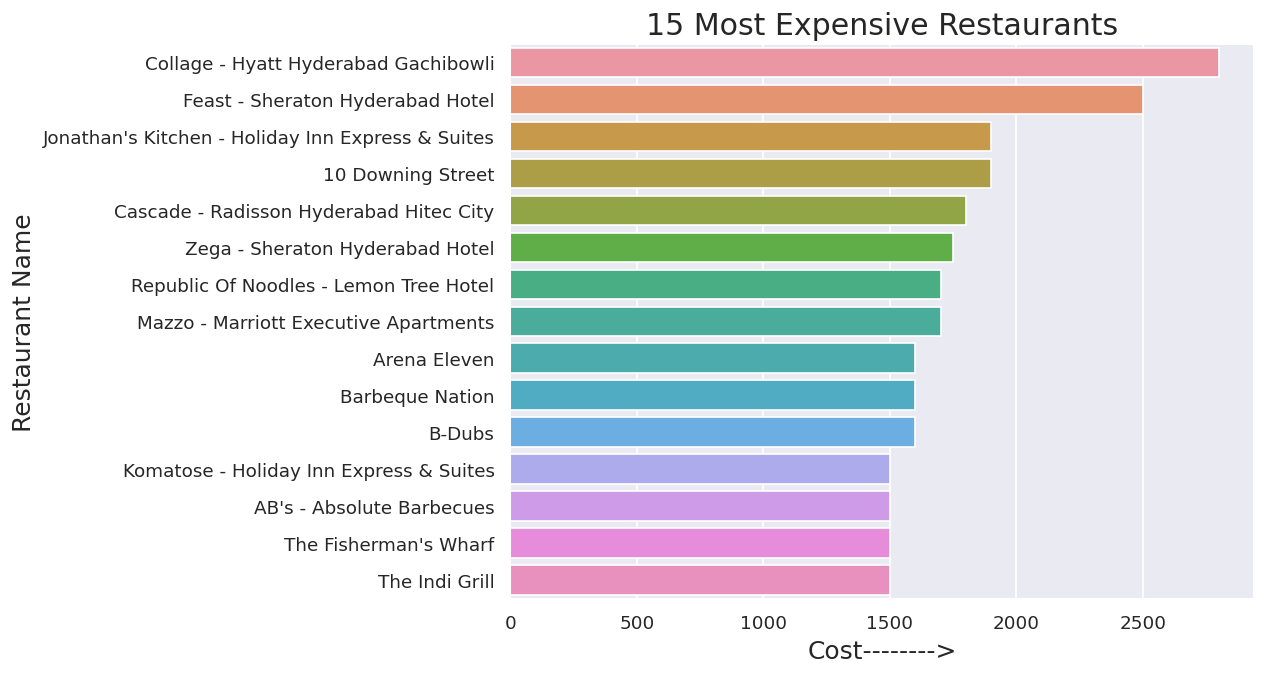

In [159]:
# Let's check for most expensive Restaurant
sns.barplot(x='Cost',
            y="Name",
            data=restaurant,
            order=restaurant.sort_values('Cost', ascending=False).Name[:15])

plt.title('15 Most Expensive Restaurants', fontsize=18)
plt.xlabel('Cost-------->', fontsize=15)
plt.ylabel('Restaurant Name', fontsize=15)

plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 2

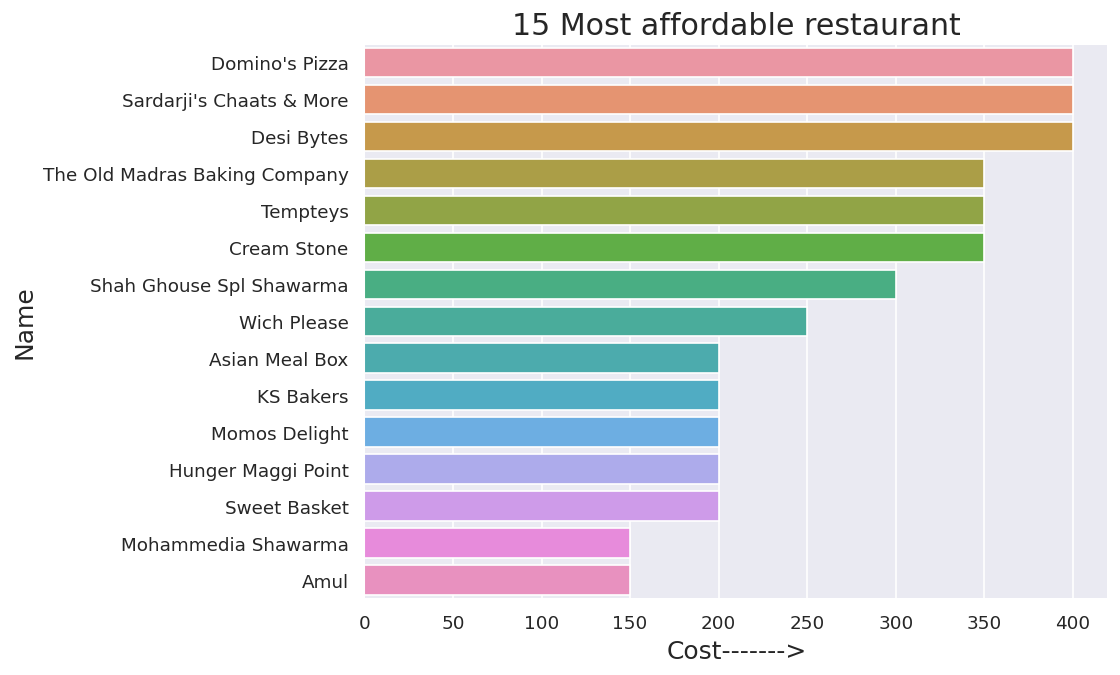

In [160]:
# checking for most affordable Restaurant
sns.barplot(x='Cost',
            y="Name",
            data=restaurant,
            order=restaurant.sort_values('Cost',ascending=False).Name[-15:])

plt.title('15 Most affordable restaurant', fontsize=18)
plt.xlabel('Cost------->', fontsize=15)
plt.ylabel('Name', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 3

In [161]:
# spliting the cusines and storing in list
cuisine_list=restaurant.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

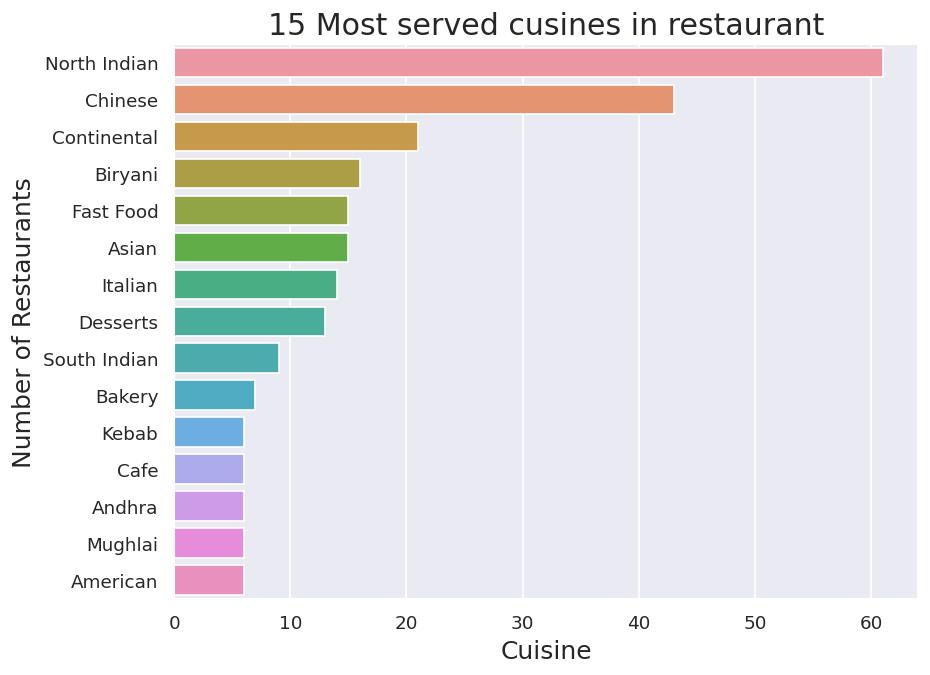

In [162]:
# storing all the cusines in a dict
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:
            cuis_dict[name]=1

# converting the dict to a data frame
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

# graph for most cusines served in restaurant
sns.barplot(y='Cuisine',
            x="Number of Restaurants",
            data=cuis_df,
            order=cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:15])
plt.title('15 Most served cusines in restaurant', fontsize=18)
plt.xlabel('Cuisine', fontsize=15)
plt.ylabel('Number of Restaurants', fontsize=15)
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 4

(-0.5, 1399.5, 1399.5, -0.5)

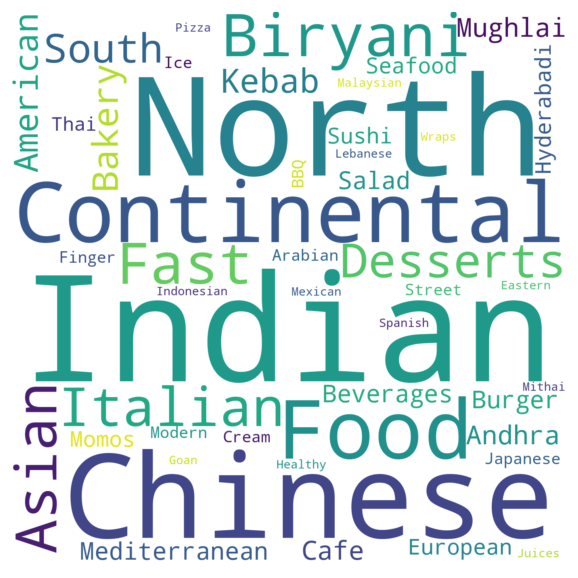

In [163]:
#Creating the text variable

text = " ".join(name for name in restaurant.Cuisines )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 5

In [164]:
# spliting the cusines and storing in list
Collections_list=restaurant.Collections.dropna().str.split(', ')
Collections_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                   [Great Buffets, Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs, Food Hygiene Rated Restaura...
5      [Sunday Brunches, Corporate Favorites, Great B...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets, Live Sports Screenings, Best B...
9                                      [Frozen Delights]
10       [Street Food, Veggie Friendly, Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites, Happy Hours, Live Sports...
14     [Barbecue & Grill, Great Buffets, Corporate Fa...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                      [Great 

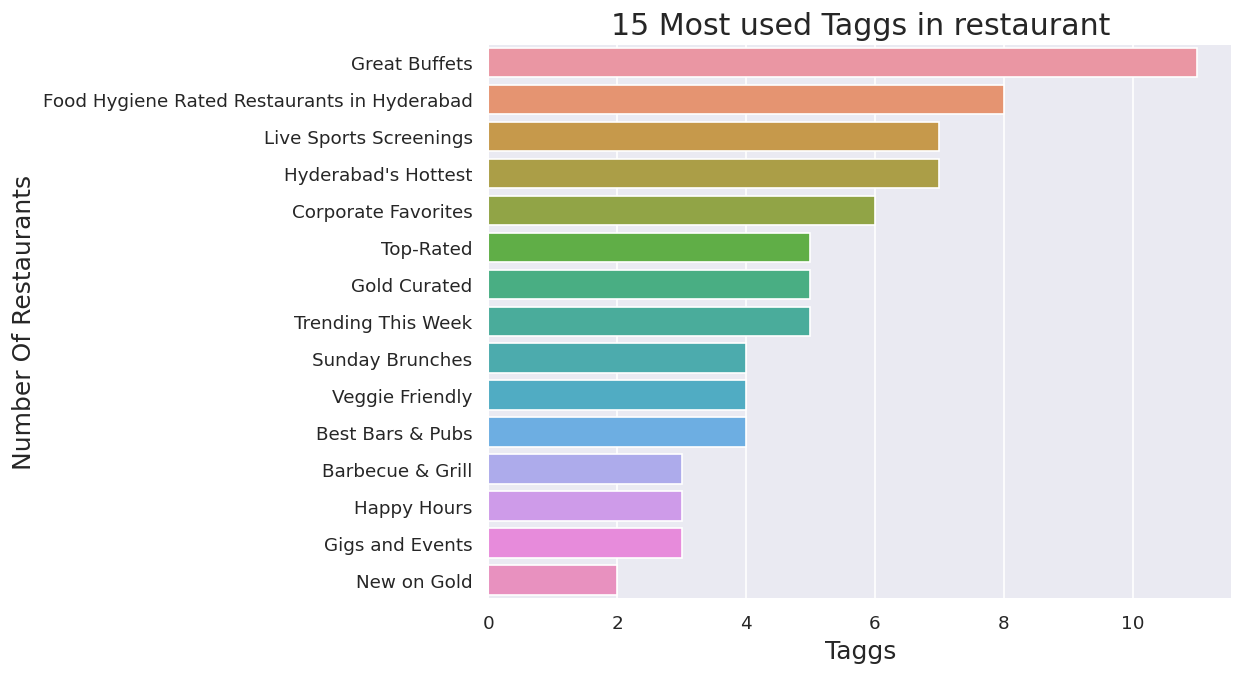

In [165]:
# storing all the cusines in a dict
Collections_dict = {}
for names in Collections_list:
    for name in names:
        if (name in Collections_dict):
            Collections_dict[name]+=1
        else:
            Collections_dict[name]=1

# converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Taggs',0:'Number of Restaurants'})

# graph for most cusines served in restaurant
sns.barplot(y='Taggs',
            x="Number of Restaurants",
            data=Collections_df,
            order=Collections_df.sort_values('Number of Restaurants',ascending=False).Taggs[:15])
plt.title('15 Most used Taggs in restaurant', fontsize=18)
plt.xlabel('Taggs', fontsize=15)
plt.ylabel('Number Of Restaurants', fontsize=15)
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 6

(-0.5, 1399.5, 1399.5, -0.5)

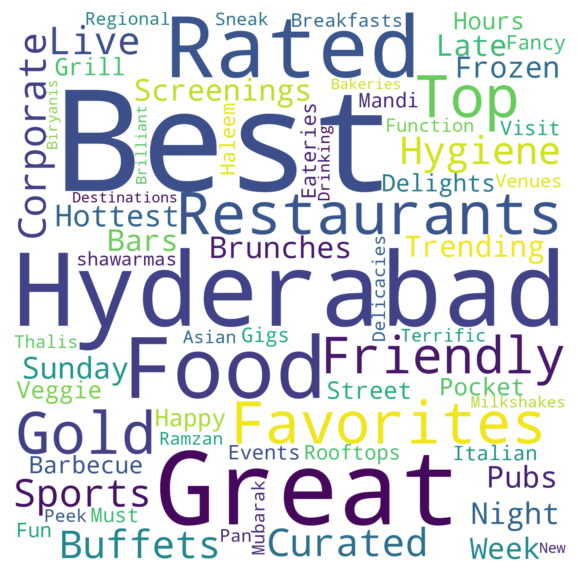

In [166]:
#Creating the text variable

text = " ".join(name for name in Collections_df.Taggs )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 7

In [167]:
review['Year'].value_counts()

2018.0    4903
2019.0    4802
2017.0     213
2016.0      43
Name: Year, dtype: int64

In [168]:
#better visualisation with plotly
temp_df1 = review['Hour'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['Hour'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'RATING OVER THE Hour' , xaxis = dict(title = 'Hour'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 8

In [169]:
import plotly.graph_objects as go

# Calculate the percentage of each day category
days_count = review['Day'].value_counts()
total_days = len(review['Day'])
percentage_days = days_count / total_days * 100

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=days_count.index,
    values=percentage_days,
    hole=0.5,
    textinfo='percent',
    marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
)])

# Set the title and legend color
title_color = '#8a8d93'
legend_color = 'white'

fig.update_layout(
    title='Review Distribution by Day',
    title_font=dict(size=25, color=title_color, family="Lato, sans-serif"),
    plot_bgcolor='#444',
    paper_bgcolor='#444',
    legend=dict(
        bgcolor='rgba(0,0,0,0)',  # Set the legend background color to transparent
        font=dict(color=legend_color)
    )
)

# Display the chart
fig.show(renderer='colab')


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 9

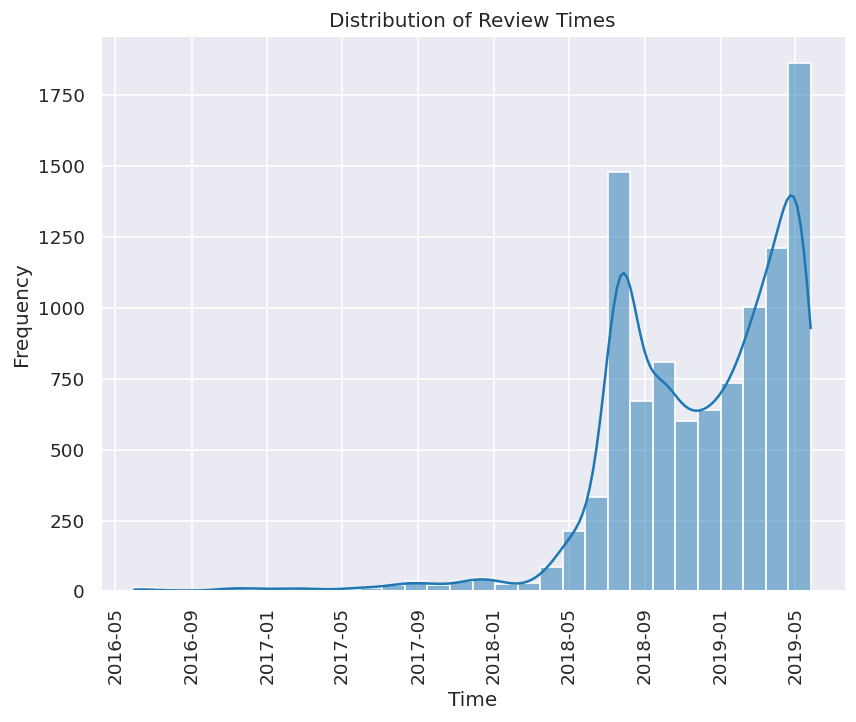

In [170]:

sns.histplot(review['Time'], bins=30, kde=True, color='#1f77b4')

# Set the title and axis labels
plt.title('Distribution of Review Times')
plt.xlabel('Time')
plt.ylabel('Frequency')

# Customize the plot background and grid
sns.set(style='whitegrid', rc={'axes.facecolor': '#f0f0f0', 'grid.color': 'white'})

# Remove the right and top spines
sns.despine(right=True, top=True)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 10

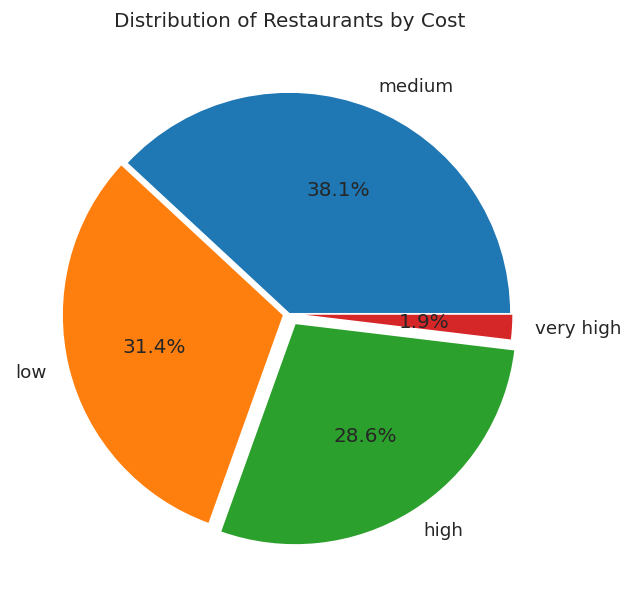

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'restaurant' is your DataFrame containing the restaurant data
# Define the cost categories and corresponding labels
cost_categories = {
    'low': (0, 500),
    'medium': (500, 1000),
    'high': (1000, 2000),
    'very high': (2000, float('inf'))
}

# Categorize restaurants based on their cost
def categorize_cost(cost):
    for category, (min_cost, max_cost) in cost_categories.items():
        if min_cost <= cost <= max_cost:
            return category

# Apply the categorization function to the 'Cost' column
restaurant['Cost Category'] = restaurant['Cost'].apply(categorize_cost)

# Count the number of restaurants in each cost category
cost_category_counts = restaurant['Cost Category'].value_counts()

# Create a pie chart
explode = (0, 0.025, 0.05, 0.01)  # Explode the 'medium' slice
plt.pie(cost_category_counts, labels=cost_category_counts.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], explode=explode)

# Set the title
plt.title('Distribution of Restaurants by Cost')


# Show the plot
plt.show()


In [172]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           105 non-null    object
 1   Links          105 non-null    object
 2   Cost           105 non-null    int64 
 3   Collections    51 non-null     object
 4   Cuisines       105 non-null    object
 5   Timings        104 non-null    object
 6   Cost Category  105 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.9+ KB


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

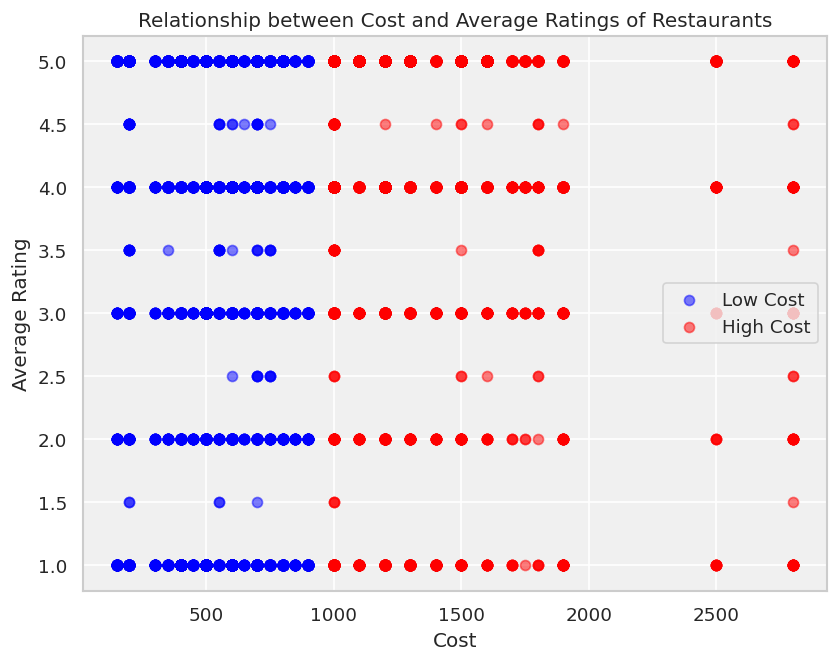

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'restaurant' is your DataFrame containing the restaurant data
# Assuming 'review' is your DataFrame containing the review data

# Merge 'restaurant' DataFrame with 'review' DataFrame on the common column 'Name'
merged_df = pd.merge(restaurant, review, left_on='Name', right_on='Restaurant')

# Convert the 'Cost' and 'Rating' columns to numeric (if they are not already numeric)
merged_df['Cost'] = pd.to_numeric(merged_df['Cost'], errors='coerce')
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')

# Drop rows with missing values in 'Cost' or 'Rating' columns
merged_df = merged_df.dropna(subset=['Cost', 'Rating'])

# Create separate DataFrames for low cost and high cost
low_cost_df = merged_df[merged_df['Cost'] < 1000]  # Set the threshold for low cost as per your requirement
high_cost_df = merged_df[merged_df['Cost'] >= 1000]  # Set the threshold for high cost as per your requirement

# Create a scatter plot for low cost restaurants
plt.scatter(low_cost_df['Cost'], low_cost_df['Rating'], color='blue', alpha=0.5, label='Low Cost')

# Create a scatter plot for high cost restaurants
plt.scatter(high_cost_df['Cost'], high_cost_df['Rating'], color='red', alpha=0.5, label='High Cost')

# Set the title and axis labels
plt.title('Relationship between Cost and Average Ratings of Restaurants')
plt.xlabel('Cost')
plt.ylabel('Average Rating')

# Add a legend
plt.legend()

# Show the plot
plt.show()


* how do the rating vary across different days of the week ?

Text(0, 0.5, 'Average Rating')

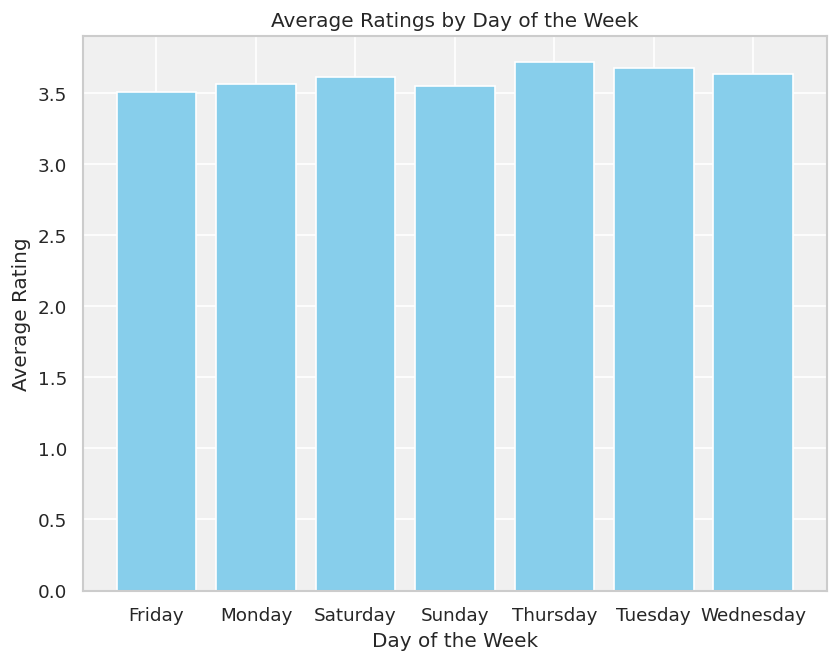

In [176]:
# Group the data by the day of the week and calculate the average rating for each day
average_ratings_by_day = merged_df.groupby('Day')['Rating'].mean()

# Plot the average ratings for different days of the week
plt.bar(average_ratings_by_day.index, average_ratings_by_day.values, color='skyblue')

# Set the title and axis labels
plt.title('Average Ratings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rating')

In [177]:
restaurant['Collections'][0]

'Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings'

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
def lower_case(text):
  '''convert the string in lower case
  '''
  text=[x.lower() for x in text]
  return text
reviews=lower_case(reviews)

#### 3. Removing Punctuations

In [ ]:
import string
def remove_punctuation (text):
  '''remove punctuation from the the list of strings
  '''
  text = [''.join(c for c in s if c not in string.punctuation) for s in text]
  return text

#### 4. Removing URLs & Removing words and digits contain digits.

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
def Change_text(msg):
  '''Removing StopWord
  '''
  main_text=[word for word in no_punc.split() if word.lower() not in stop_list]
  return ' '.join(main_text)

In [ ]:
def remove_stop_words (text):
  test_2=[]
  for x in reviews:
    test_1=[]
    for i in x.split(' '):
      if i not in stop_word_list:
        test_1.append(i)
    test_2.append(' '.join(test_1))
  return test_2

In [ ]:
def remove_all_extra_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

#### 6. Rephrase Text

#### 7. Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

#### 9. Part of speech tagging

#### 10. Text Vectorization

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### 6. Data Scaling

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

### 8. Data Splitting

##### What data splitting ratio have you used and why?

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### ML Model - 2

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### ML Model - 3

# **Conclusion**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***